## import modules

In [89]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [90]:
arr0 = torch.tensor([[3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
print(arr0)
print(arr0.shape)

tensor([[3., 4., 5.],
        [6., 7., 8.]])
torch.Size([2, 3])


In [91]:
arr1 = np.array([[1,2,3],[4,5,6]])
print(arr1)
t_array1 = torch.from_numpy(arr1)
print(t_array1)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [92]:
torch.manual_seed(0)
arr3 = torch.rand((2,3))
print(arr3)
print(arr3.shape)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
torch.Size([2, 3])


In [93]:
print(arr0 + arr3)

tensor([[3.4963, 4.7682, 5.0885],
        [6.1320, 7.3074, 8.6341]])


In [94]:
print(arr0 * arr3)

tensor([[1.4888, 3.0729, 0.4424],
        [0.7922, 2.1520, 5.0726]])


In [95]:
print(arr0.T.matmul(arr3))
print(arr3.T.matmul(arr0).T)

tensor([[2.2810, 4.1492, 4.0699],
        [2.9092, 5.2248, 4.7925],
        [3.5375, 6.3005, 5.5150]])
tensor([[2.2810, 4.1492, 4.0699],
        [2.9092, 5.2248, 4.7925],
        [3.5375, 6.3005, 5.5150]])


In [96]:
bias = torch.tensor([30.0, 40.0, 50.0])
print(arr0 + bias)

tensor([[33., 44., 55.],
        [36., 47., 58.]])


# einsum

## trace

In [97]:
m1 = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
m2 = torch.tensor([[10,20,30,40],[50,60,70,80],[90,100,110,120],[130,140,150,160]])
print(m1)
torch.einsum('ii', m1)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])


tensor(34)

## diagonal

In [98]:
torch.einsum('ii->i', m1)

tensor([ 1,  6, 11, 16])

## outer product

In [99]:
arr1 = torch.tensor([1,2,3,4,5])
arr2 = torch.tensor([10,20,30,40,50])
torch.einsum('i,j->ij', arr1, arr2)

tensor([[ 10,  20,  30,  40,  50],
        [ 20,  40,  60,  80, 100],
        [ 30,  60,  90, 120, 150],
        [ 40,  80, 120, 160, 200],
        [ 50, 100, 150, 200, 250]])

## batch matrix multiplication

In [100]:
As = torch.randn(3,2,5)
Bs = torch.randn(3,5,4)
torch.einsum('bij,bjk->bik', As, Bs)

tensor([[[-1.1223,  2.8596,  0.1298,  1.4445],
         [-1.8879, -0.9510,  0.9330, -0.7948]],

        [[ 0.9520, -4.9026, -1.3021, -3.0249],
         [-0.5488,  1.0961, -1.6959,  0.4218]],

        [[-1.7572, -3.7664,  2.5861, -2.6032],
         [ 2.2228, -0.8318, -2.5297, -0.6959]]])

## batch permute

In [101]:
A = torch.randn(2, 3, 4, 5)
torch.einsum('...ij->...ji', A).shape

torch.Size([2, 3, 5, 4])

## equivalent to torch.nn.functional.bilinear

In [102]:
A = torch.randn(3,5,4)
l = torch.randn(2,5)
r = torch.randn(2,4)
torch.einsum('bn,anm,bm->ba', l, A, r)

tensor([[-1.3928, -3.9263,  3.2407],
        [-0.8054,  0.9632,  1.4130]])

# Simple optimization
$loss(a, b) = (a-3)^2 + (b-1)^2$ 
with a minimum at (3.0, 1.0)

In [103]:
x = torch.tensor([1.0, -4.0], requires_grad=True)
optimum = torch.tensor([3.0, 1.0])
print(x)

tensor([ 1., -4.], requires_grad=True)


0: [ 1. -4.] -> 29.0
1000: [3.3106554 2.687223 ] -> 2.9432282
2000: [2.53662    0.70654154] -> 0.30083898
3000: [3.3487608  0.98602885] -> 0.121829316
4000: [2.7581794  0.35221198] -> 0.47810656
5000: [2.829058  2.2366703] -> 1.5585746
6000: [2.940081  1.9385612] -> 0.8844874
7000: [3.050189   0.54682434] -> 0.20788711
8000: [2.9520786 1.025446 ] -> 0.0029439642
9000: [3.017674  1.2130578] -> 0.045705978
10000: [3.0176642 0.8000911] -> 0.040275596
11000: [3.0132844 1.1370791] -> 0.018967161
12000: [3.004109   0.88448936] -> 0.013359591
13000: [3.0079718 0.9551707] -> 0.002073216
14000: [2.9927087 1.0302624] -> 0.0009689732
15000: [2.99418  1.039225] -> 0.001572472
16000: [3.005395  0.9751681] -> 0.00064572814
17000: [3.0049822 0.9834145] -> 0.00029990243
18000: [2.9985197 0.9864493] -> 0.00018581285
19000: [2.9972272 0.9956952] -> 2.6219994e-05
20000: [2.9960363  0.99249035] -> 7.210581e-05
21000: [2.9952967 1.0056723] -> 5.4296266e-05
22000: [2.9948938 1.0035969] -> 3.901109e-05
23000

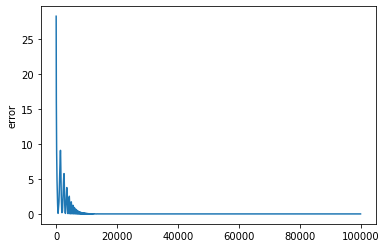

found [3.0020955 1.0006645]: 
optimum [3. 1.]: 


In [104]:
optimizer = torch.optim.RMSprop([x], lr=0.005)
losses = []
for iter in range(100000):
    loss = (x-optimum).dot(x-optimum)
    if iter % 1000 == 0:
        with torch.no_grad():
            print( '%s: %s -> %s' % (iter, x.numpy(), loss.numpy()))
    else:
        losses.append(loss.detach().numpy())       
    loss.backward()
    optimizer.step()

plt.plot(losses)
plt.ylabel('error')
plt.show()
print('found %s: ' % (x.detach().numpy()))
print('optimum %s: ' % (optimum.numpy()))
   